# Oasis Infobyte Data Science Internship
## TASK 1
### IRIS FLOWER CLASSIFICATION
#### Name: ATHARVA MALI

Iris flower has three species: setosa, versicolor, and virginica, which differ according to their measurements. Now assume that you have the measurements of the iris flowers according to their species, and here your task is to train a machine learning model that can learn from the measurements of the iris species and classify them.


### Import important libraries

In [1]:
# Imported all required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans

# Import warnings
import warnings
warnings.filterwarnings('ignore')

### Adding Dataset

In [2]:
df = sns.load_dataset('iris')
df.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [3]:
df['species'],categories = pd.factorize(df['species'])
df.head()

sepal_length  sepal_width  petal_length  petal_width  species
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
4           5.0          3.6           1.4          0.2        0

In [4]:
df.describe

<bound method NDFrame.describe of      sepal_length  sepal_width  petal_length  petal_width  species
0             5.1          3.5           1.4          0.2        0
1             4.9          3.0           1.4          0.2        0
2             4.7          3.2           1.3          0.2        0
3             4.6          3.1           1.5          0.2        0
4             5.0          3.6           1.4          0.2        0
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3        2
146           6.3          2.5           5.0          1.9        2
147           6.5          3.0           5.2          2.0        2
148           6.2          3.4           5.4          2.3        2
149           5.9          3.0           5.1          1.8        2

[150 rows x 5 columns]>

In [5]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

### Visualizing the data

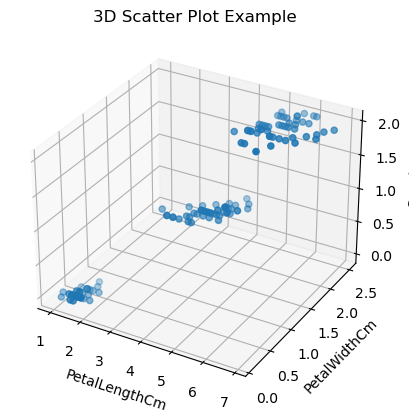

In [6]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(df.petal_length,df.petal_width,df.species)
ax.set_xlabel('PetalLengthCm')
ax.set_ylabel('PetalWidthCm')
ax.set_zlabel('Species')
plt.title('3D Scatter Plot Example')
plt.show()

### Thus 3-D plot gives us the glimpse of species of iris flower is more inclined towards the variables petal length and petal width

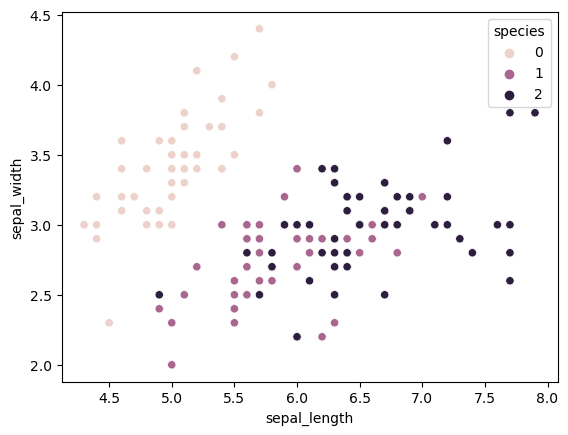

In [7]:
sns.scatterplot(data=df, x="sepal_length", y="sepal_width", hue="species");

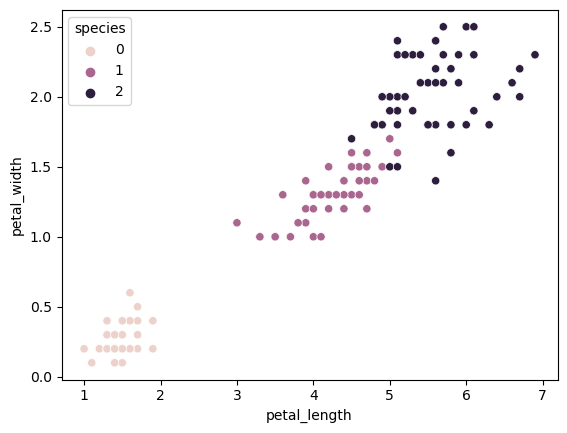

In [8]:
sns.scatterplot(data=df, x="petal_length", y="petal_width", hue="species");

### Applying Elbow Technique

In [9]:
k_rng = range(1, 10)
sse = []

for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['petal_length', 'petal_width']])
    sse.append(km.inertia_)

In [10]:
sse

[550.8953333333334,
 86.39021984551397,
 31.371358974358984,
 19.477123363965468,
 13.916908757908757,
 11.057257664362927,
 9.19386673204751,
 7.615402244955954,
 6.480259206692712]

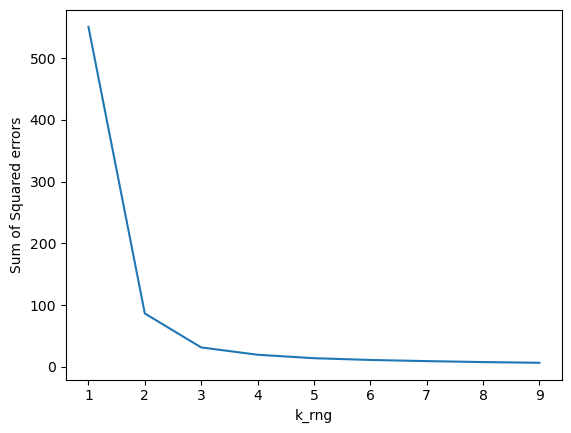

In [11]:
plt.xlabel('k_rng')
plt.ylabel("Sum of Squared errors")
plt.plot(k_rng,sse)

### Applying KMeans Algorithm

In [12]:
km = KMeans(n_clusters=3, random_state=0,)
y_predicted = km.fit_predict(df[['petal_length','petal_width']])
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [13]:
df['cluster'] = y_predicted
df.head(150)

sepal_length  sepal_width  petal_length  petal_width  species  cluster
0             5.1          3.5           1.4          0.2        0        1
1             4.9          3.0           1.4          0.2        0        1
2             4.7          3.2           1.3          0.2        0        1
3             4.6          3.1           1.5          0.2        0        1
4             5.0          3.6           1.4          0.2        0        1
..            ...          ...           ...          ...      ...      ...
145           6.7          3.0           5.2          2.3        2        2
146           6.3          2.5           5.0          1.9        2        2
147           6.5          3.0           5.2          2.0        2        2
148           6.2          3.4           5.4          2.3        2        2
149           5.9          3.0           5.1          1.8        2        2

[150 rows x 6 columns]

### Accuracy mesures

In [14]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(df.species,df.cluster)
cm

array([[ 0, 50,  0],
       [48,  0,  2],
       [ 4,  0, 46]], dtype=int64)

In [15]:
true_labels = df.species
predicted_labels = df.cluster

cm=confusion_matrix(true_labels,predicted_labels)
class_labels = ['setosa','versicolor','virginica']

# Plot Confusion Matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks=np.arange(len(class_labels))
plt.xticks(tick_marks,class_labels)
plt.yticks(tick_marks,class_labels)

# Fill matrix with values
for i in range(len(class_labels)):
    for j in range(len(class_labels)):
        plt.text(j,i,str(cm[i][j]),ha='center',va='center',color='white')

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()